# Lab 2 - Controle Postural - Leonardo Afonseca

In [35]:
from scipy import integrate
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2, "lines.markersize": 20})
import sys, os

## Leitura dos dados

Foram selecionados dois grupos, sendo o sujeito 18 e 19 para os jovens, enquanto o 4 e 41 para idosos

In [17]:
jovem_1=18
jovem_2=19
idoso_1=4
idoso_2=41

dados_avaliados = pd.read_excel (r'BDSinfo.xlsx')

In [21]:
dados_avaliados = dados_avaliados[(dados_avaliados['Subject']==jovem_1)|(dados_avaliados['Subject']==jovem_2)|\
                (dados_avaliados['Subject']==idoso_1)|(dados_avaliados['Subject']==idoso_2)]

In [32]:
dados_avaliados.head()

,Trial,Subject,Vision,Surface,Age,AgeGroup,Gender,Height,Weight,BMI,...,Best_7,Best_8,Best_9,Best_10,Best_11,Best_12,Best_13,Best_14,Best_T,Date
36,BDS00037,4,Open,Firm,61.75,Old,M,164.0,68.35,25.412701,...,2,2,2,2,2,1,2,1,26,2015-10-12 11:10:59.581
37,BDS00038,4,Open,Firm,61.75,Old,M,164.0,68.35,25.412701,...,2,2,2,2,2,1,2,1,26,2015-10-12 11:10:59.581
38,BDS00039,4,Open,Firm,61.75,Old,M,164.0,68.35,25.412701,...,2,2,2,2,2,1,2,1,26,2015-10-12 11:10:59.581
39,BDS00040,4,Open,Foam,61.75,Old,M,164.0,68.35,25.412701,...,2,2,2,2,2,1,2,1,26,2015-10-12 11:10:59.581
40,BDS00041,4,Open,Foam,61.75,Old,M,164.0,68.35,25.412701,...,2,2,2,2,2,1,2,1,26,2015-10-12 11:10:59.581


In [65]:
for i in range(1):
    name=str(dados_avaliados['Trial'].iloc[i])+'.txt'
    path=r'./BDS'
    fname = os.path.join(path,name)
    data = pd.read_csv(fname,sep='\t')
    data['Subject']=dados_avaliados['Subject'].iloc[i]
    data['Trial']=dados_avaliados['Trial'].iloc[i]
    data['Vision']=dados_avaliados['Vision'].iloc[i]
    data['Surface']=dados_avaliados['Surface'].iloc[i]
    data['AgeGroup']=dados_avaliados['AgeGroup'].iloc[i]
    data['Gender']=dados_avaliados['Gender'].iloc[i]
    
for i in range(1,48):
    name=str(dados_avaliados['Trial'].iloc[i])+'.txt'
    path=r'./BDS'
    fname = os.path.join(path,name)
    data_aux = pd.read_csv(fname,sep='\t')
    data_aux['Subject']=dados_avaliados['Subject'].iloc[i]
    data_aux['Trial']=dados_avaliados['Trial'].iloc[i]
    data_aux['Vision']=dados_avaliados['Vision'].iloc[i]
    data_aux['Surface']=dados_avaliados['Surface'].iloc[i]
    data_aux['AgeGroup']=dados_avaliados['AgeGroup'].iloc[i]
    data_aux['Gender']=dados_avaliados['Gender'].iloc[i]
    
    data=pd.concat([data,data_aux],axis=0)
    

In [66]:
data

,Time[s],Fx[N],Fy[N],Fz[N],Mx[Nm],My[Nm],Mz[Nm],COPx[cm],COPy[cm],Subject,Trial,Vision,Surface,AgeGroup,Gender
0,0.01,5.908428,-6.846922,665.248639,-5.089373,36.816309,0.876617,-5.534218,-0.765033,4,BDS00037,Open,Firm,Old,M
1,0.02,5.956013,-6.793408,665.463906,-5.114474,36.663976,0.876093,-5.509536,-0.768558,4,BDS00037,Open,Firm,Old,M
2,0.03,5.994217,-6.750461,665.653588,-5.139280,36.521669,0.874621,-5.486588,-0.772065,4,BDS00037,Open,Firm,Old,M
3,0.04,6.016112,-6.727259,665.807669,-5.162560,36.397546,0.871824,-5.466676,-0.775383,4,BDS00037,Open,Firm,Old,M
4,0.05,6.018547,-6.728615,665.935397,-5.182047,36.296088,0.868168,-5.450392,-0.778161,4,BDS00037,Open,Firm,Old,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,59.96,5.848567,-6.497225,689.537901,2.365416,5.612241,2.412305,-0.813913,0.343044,41,BDS00492,Open,Foam,Old,M
5996,59.97,5.912797,-6.366414,690.360601,2.633128,5.556465,2.415906,-0.804864,0.381413,41,BDS00492,Open,Foam,Old,M
5997,59.98,5.911886,-6.162541,690.045589,3.061290,5.468370,2.417975,-0.792465,0.443636,41,BDS00492,Open,Foam,Old,M
5998,59.99,5.830016,-5.895066,688.634290,3.634236,5.360145,2.417748,-0.778373,0.527745,41,BDS00492,Open,Foam,Old,M


## Cálculo das amplitudes

In [104]:
grupo = data[['Subject','Vision','Surface','AgeGroup','COPx[cm]','COPy[cm]','Trial']]

(grupo.groupby(['AgeGroup','Subject','Vision','Surface','Trial']).max()-\
grupo.groupby(['AgeGroup','Subject','Vision','Surface','Trial']).min())

COPx[cm]  COPy[cm]
AgeGroup Subject Vision Surface Trial                        
Old      4       Closed Firm    BDS00046   5.074713  1.672301
                                BDS00047   4.221567  1.647051
                                BDS00048   3.989642  1.232907
                        Foam    BDS00043   9.203783  7.473765
                                BDS00044   8.950164  7.826385
                                BDS00045   9.028012  8.444881
                 Open   Firm    BDS00037   3.364649  1.398910
                                BDS00038   3.712589  2.341780
                                BDS00039   4.203364  2.389182
                        Foam    BDS00040   6.395055  6.659278
                                BDS00041   8.863381  6.469691
                                BDS00042  10.958226  9.092722
         41      Closed Firm    BDS00484   3.631196  1.144492
                                BDS00485   3.100425  1.445856
                                BDS00486   3.076444  1.439312
                        Foam    BDS00487   8.620408  8.905614
                                BDS00488   7.205823  6.742242
                                BDS00489  11.115734  8.564542
                 Open   Firm    BDS00481   2.878419  1.595073
                                BDS00482   2.705213  2.485809
                                BDS00483   2.780768  1.967341
                        Foam    BDS00490   6.067675  4.784603
                                BDS00491  10.929820  7.558583
                                BDS00492   5.574673  3.993521
Young    18      Closed Firm    BDS00214   2.673381  1.630617
                                BDS00215   3.450928  2.434281
                                BDS00216   4.210024  2.282218
                        Foam    BDS00205   4.716135  4.374039
                                BDS00206   4.652375  4.081961
                                BDS00207   6.116009  5.175605
                 Open   Firm    BDS00211   2.010759  2.442890
                                BDS00212   2.965040  1.851918
                                BDS00213   3.659648  1.663284
                        Foam    BDS00208   6.705566  3.132465
                                BDS00209   4.538744  4.511983
                                BDS00210   4.355060  3.391754
         19      Closed Firm    BDS00217   1.439937  1.196837
                                BDS00218   2.190877  0.948135
                                BDS00219   1.571021  0.709267
                        Foam    BDS00220   6.635905  4.488837
                                BDS00221   5.193479  4.160001
                                BDS00222   6.629715  3.390365
                 Open   Firm    BDS00223   1.108335  0.604938
                                BDS00224   1.884544  0.538710
                                BDS00225   1.793010  0.686093
                        Foam    BDS00226   4.664611  2.636059
                                BDS00227   4.696747  4.076998
                                BDS00228   4.098682  4.021387

## Cálculo dos desvios padrões

In [100]:
grupo.groupby(['AgeGroup','Subject','Vision','Surface','Trial']).std()

COPx[cm]  COPy[cm]
AgeGroup Subject Vision Surface Trial                       
Old      4       Closed Firm    BDS00046  0.779747  0.328216
                                BDS00047  0.858810  0.344173
                                BDS00048  0.813146  0.206106
                        Foam    BDS00043  1.882226  1.401489
                                BDS00044  1.552270  1.651171
                                BDS00045  1.745590  1.526146
                 Open   Firm    BDS00037  0.546166  0.265477
                                BDS00038  0.676394  0.333310
                                BDS00039  0.811687  0.305938
                        Foam    BDS00040  1.263442  1.276955
                                BDS00041  1.407310  1.201245
                                BDS00042  1.562468  1.624303
         41      Closed Firm    BDS00484  0.677289  0.256704
                                BDS00485  0.591307  0.237788
                                BDS00486  0.519678  0.321562
                        Foam    BDS00487  1.344000  1.308573
                                BDS00488  1.348955  1.063852
                                BDS00489  1.662212  1.422658
                 Open   Firm    BDS00481  0.514320  0.302677
                                BDS00482  0.506666  0.473890
                                BDS00483  0.593895  0.321577
                        Foam    BDS00490  1.137240  0.935495
                                BDS00491  1.319405  1.083881
                                BDS00492  1.019918  0.798438
Young    18      Closed Firm    BDS00214  0.439245  0.269835
                                BDS00215  0.739731  0.600842
                                BDS00216  0.941631  0.597539
                        Foam    BDS00205  0.865227  0.728889
                                BDS00206  1.022699  0.659674
                                BDS00207  1.075365  1.016267
                 Open   Firm    BDS00211  0.333695  0.544545
                                BDS00212  0.559828  0.344152
                                BDS00213  0.712638  0.269064
                        Foam    BDS00208  1.221951  0.580693
                                BDS00209  0.808015  0.744613
                                BDS00210  0.894784  0.615822
         19      Closed Firm    BDS00217  0.326864  0.173528
                                BDS00218  0.418471  0.144039
                                BDS00219  0.373762  0.092210
                        Foam    BDS00220  1.062794  0.721212
                                BDS00221  0.845475  0.626603
                                BDS00222  1.166102  0.581108
                 Open   Firm    BDS00223  0.183994  0.128225
                                BDS00224  0.400761  0.111012
                                BDS00225  0.370528  0.119701
                        Foam    BDS00226  0.769744  0.501508
                                BDS00227  0.867869  0.635963
                                BDS00228  0.877617  0.764525

## Média das 3 tentativas

### Amplitude

In [105]:
(grupo.groupby(['AgeGroup','Subject','Vision','Surface','Trial']).max()-\
grupo.groupby(['AgeGroup','Subject','Vision','Surface','Trial']).min()).\
groupby(['AgeGroup','Subject','Vision','Surface']).mean()

COPx[cm]  COPy[cm]
AgeGroup Subject Vision Surface                    
Old      4       Closed Firm     4.428641  1.517420
                        Foam     9.060653  7.915010
                 Open   Firm     3.760201  2.043291
                        Foam     8.738887  7.407230
         41      Closed Firm     3.269355  1.343220
                        Foam     8.980655  8.070799
                 Open   Firm     2.788133  2.016074
                        Foam     7.524056  5.445569
Young    18      Closed Firm     3.444778  2.115705
                        Foam     5.161506  4.543868
                 Open   Firm     2.878482  1.986031
                        Foam     5.199790  3.678734
         19      Closed Firm     1.733945  0.951413
                        Foam     6.153033  4.013068
                 Open   Firm     1.595296  0.609914
                        Foam     4.486680  3.578148

### Desvio padrão

In [106]:
grupo.groupby(['AgeGroup','Subject','Vision','Surface','Trial']).std().groupby(['AgeGroup','Subject','Vision','Surface']).mean()

COPx[cm]  COPy[cm]
AgeGroup Subject Vision Surface                    
Old      4       Closed Firm     0.817234  0.292832
                        Foam     1.726695  1.526269
                 Open   Firm     0.678083  0.301575
                        Foam     1.411073  1.367501
         41      Closed Firm     0.596091  0.272018
                        Foam     1.451723  1.265028
                 Open   Firm     0.538294  0.366048
                        Foam     1.158854  0.939271
Young    18      Closed Firm     0.706869  0.489405
                        Foam     0.987764  0.801610
                 Open   Firm     0.535387  0.385920
                        Foam     0.974917  0.647043
         19      Closed Firm     0.373032  0.136592
                        Foam     1.024791  0.642975
                 Open   Firm     0.318428  0.119646
                        Foam     0.838410  0.633999

## Desvio padrão das 3 tentativas

### Amplitude

In [107]:
(grupo.groupby(['AgeGroup','Subject','Vision','Surface','Trial']).max()-\
grupo.groupby(['AgeGroup','Subject','Vision','Surface','Trial']).min()).\
groupby(['AgeGroup','Subject','Vision','Surface']).std()

COPx[cm]  COPy[cm]
AgeGroup Subject Vision Surface                    
Old      4       Closed Firm     0.571406  0.246718
                        Foam     0.129922  0.491587
                 Open   Firm     0.421380  0.558553
                        Foam     2.284131  1.462753
         41      Closed Firm     0.313593  0.172135
                        Foam     1.979693  1.163134
                 Open   Firm     0.086838  0.447363
                        Foam     2.959761  1.872184
Young    18      Closed Firm     0.768340  0.426924
                        Foam     0.827238  0.566256
                 Open   Firm     0.827845  0.406738
                        Foam     1.307270  0.733168
         19      Closed Firm     0.401106  0.243802
                        Foam     0.831004  0.563784
                 Open   Firm     0.424197  0.073817
                        Foam     0.336400  0.816347

### Desvio Padrão

In [108]:
grupo.groupby(['AgeGroup','Subject','Vision','Surface','Trial']).std().groupby(['AgeGroup','Subject','Vision','Surface']).std()

COPx[cm]  COPy[cm]
AgeGroup Subject Vision Surface                    
Old      4       Closed Firm     0.039690  0.075529
                        Foam     0.165787  0.124841
                 Open   Firm     0.132768  0.034127
                        Foam     0.149548  0.225596
         41      Closed Firm     0.078914  0.043936
                        Foam     0.182306  0.183323
                 Open   Firm     0.048304  0.093871
                        Foam     0.150909  0.142759
Young    18      Closed Firm     0.252800  0.190161
                        Foam     0.109338  0.189093
                 Open   Firm     0.190650  0.142411
                        Foam     0.218292  0.086305
         19      Closed Firm     0.045808  0.041167
                        Foam     0.163657  0.071472
                 Open   Firm     0.117400  0.008607
                        Foam     0.059666  0.131519

## Média por grupo

### Amplitude

In [109]:
(grupo.groupby(['AgeGroup','Subject','Vision','Surface','Trial']).max()-\
grupo.groupby(['AgeGroup','Subject','Vision','Surface','Trial']).min()).\
groupby(['AgeGroup','Subject','Vision','Surface']).mean().groupby(['AgeGroup','Vision','Surface']).mean()

COPx[cm]  COPy[cm]
AgeGroup Vision Surface                    
Old      Closed Firm     3.848998  1.430320
                Foam     9.020654  7.992905
         Open   Firm     3.274167  2.029682
                Foam     8.131472  6.426400
Young    Closed Firm     2.589361  1.533559
                Foam     5.657270  4.278468
         Open   Firm     2.236889  1.297972
                Foam     4.843235  3.628441

### Desvio padrão

In [113]:
grupo.groupby(['AgeGroup','Subject','Vision','Surface','Trial']).std().groupby(['AgeGroup','Subject','Vision','Surface']).mean().\
groupby(['AgeGroup','Vision','Surface']).mean()

COPx[cm]  COPy[cm]
AgeGroup Vision Surface                    
Old      Closed Firm     0.706663  0.282425
                Foam     1.589209  1.395648
         Open   Firm     0.608188  0.333812
                Foam     1.284964  1.153386
Young    Closed Firm     0.539951  0.312999
                Foam     1.006277  0.722292
         Open   Firm     0.426907  0.252783
                Foam     0.906663  0.640521

## Desvio padrão por grupo

### Amplitude

In [110]:
(grupo.groupby(['AgeGroup','Subject','Vision','Surface','Trial']).max()-\
grupo.groupby(['AgeGroup','Subject','Vision','Surface','Trial']).min()).\
groupby(['AgeGroup','Subject','Vision','Surface']).mean().groupby(['AgeGroup','Vision','Surface']).std()

COPx[cm]  COPy[cm]
AgeGroup Vision Surface                    
Old      Closed Firm     0.819739  0.123178
                Foam     0.056567  0.110159
         Open   Firm     0.687355  0.019245
                Foam     0.859015  1.387104
Young    Closed Firm     1.209741  0.823279
                Foam     0.701115  0.375333
         Open   Firm     0.907350  0.973062
                Foam     0.504245  0.071125

### Desvio padrão

In [114]:
grupo.groupby(['AgeGroup','Subject','Vision','Surface','Trial']).std().groupby(['AgeGroup','Subject','Vision','Surface']).mean().\
groupby(['AgeGroup','Vision','Surface']).std()

COPx[cm]  COPy[cm]
AgeGroup Vision Surface                    
Old      Closed Firm     0.156372  0.014718
                Foam     0.194435  0.184725
         Open   Firm     0.098846  0.045589
                Foam     0.178346  0.302804
Young    Closed Firm     0.236058  0.249476
                Foam     0.026182  0.112172
         Open   Firm     0.153413  0.188284
                Foam     0.096525  0.009223

In [115]:
data

,Time[s],Fx[N],Fy[N],Fz[N],Mx[Nm],My[Nm],Mz[Nm],COPx[cm],COPy[cm],Subject,Trial,Vision,Surface,AgeGroup,Gender
0,0.01,5.908428,-6.846922,665.248639,-5.089373,36.816309,0.876617,-5.534218,-0.765033,4,BDS00037,Open,Firm,Old,M
1,0.02,5.956013,-6.793408,665.463906,-5.114474,36.663976,0.876093,-5.509536,-0.768558,4,BDS00037,Open,Firm,Old,M
2,0.03,5.994217,-6.750461,665.653588,-5.139280,36.521669,0.874621,-5.486588,-0.772065,4,BDS00037,Open,Firm,Old,M
3,0.04,6.016112,-6.727259,665.807669,-5.162560,36.397546,0.871824,-5.466676,-0.775383,4,BDS00037,Open,Firm,Old,M
4,0.05,6.018547,-6.728615,665.935397,-5.182047,36.296088,0.868168,-5.450392,-0.778161,4,BDS00037,Open,Firm,Old,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,59.96,5.848567,-6.497225,689.537901,2.365416,5.612241,2.412305,-0.813913,0.343044,41,BDS00492,Open,Foam,Old,M
5996,59.97,5.912797,-6.366414,690.360601,2.633128,5.556465,2.415906,-0.804864,0.381413,41,BDS00492,Open,Foam,Old,M
5997,59.98,5.911886,-6.162541,690.045589,3.061290,5.468370,2.417975,-0.792465,0.443636,41,BDS00492,Open,Foam,Old,M
5998,59.99,5.830016,-5.895066,688.634290,3.634236,5.360145,2.417748,-0.778373,0.527745,41,BDS00492,Open,Foam,Old,M


In [140]:
data[(data['Trial']=='BDS00037')]

,Time[s],Fx[N],Fy[N],Fz[N],Mx[Nm],My[Nm],Mz[Nm],COPx[cm],COPy[cm],Subject,Trial,Vision,Surface,AgeGroup,Gender
0,0.01,5.908428,-6.846922,665.248639,-5.089373,36.816309,0.876617,-5.534218,-0.765033,4,BDS00037,Open,Firm,Old,M
1,0.02,5.956013,-6.793408,665.463906,-5.114474,36.663976,0.876093,-5.509536,-0.768558,4,BDS00037,Open,Firm,Old,M
2,0.03,5.994217,-6.750461,665.653588,-5.139280,36.521669,0.874621,-5.486588,-0.772065,4,BDS00037,Open,Firm,Old,M
3,0.04,6.016112,-6.727259,665.807669,-5.162560,36.397546,0.871824,-5.466676,-0.775383,4,BDS00037,Open,Firm,Old,M
4,0.05,6.018547,-6.728615,665.935397,-5.182047,36.296088,0.868168,-5.450392,-0.778161,4,BDS00037,Open,Firm,Old,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,59.96,5.129507,-6.194374,666.849584,-6.915908,43.405059,0.645312,-6.508973,-1.037102,4,BDS00037,Open,Firm,Old,M
5996,59.97,5.110841,-6.173714,667.390671,-6.871905,43.539640,0.635507,-6.523861,-1.029667,4,BDS00037,Open,Firm,Old,M
5997,59.98,5.073756,-6.145144,667.841092,-6.804599,43.662605,0.626463,-6.537873,-1.018895,4,BDS00037,Open,Firm,Old,M
5998,59.99,5.021614,-6.108781,668.177927,-6.716665,43.772833,0.618809,-6.551074,-1.005221,4,BDS00037,Open,Firm,Old,M


(-5.0, 5.0)

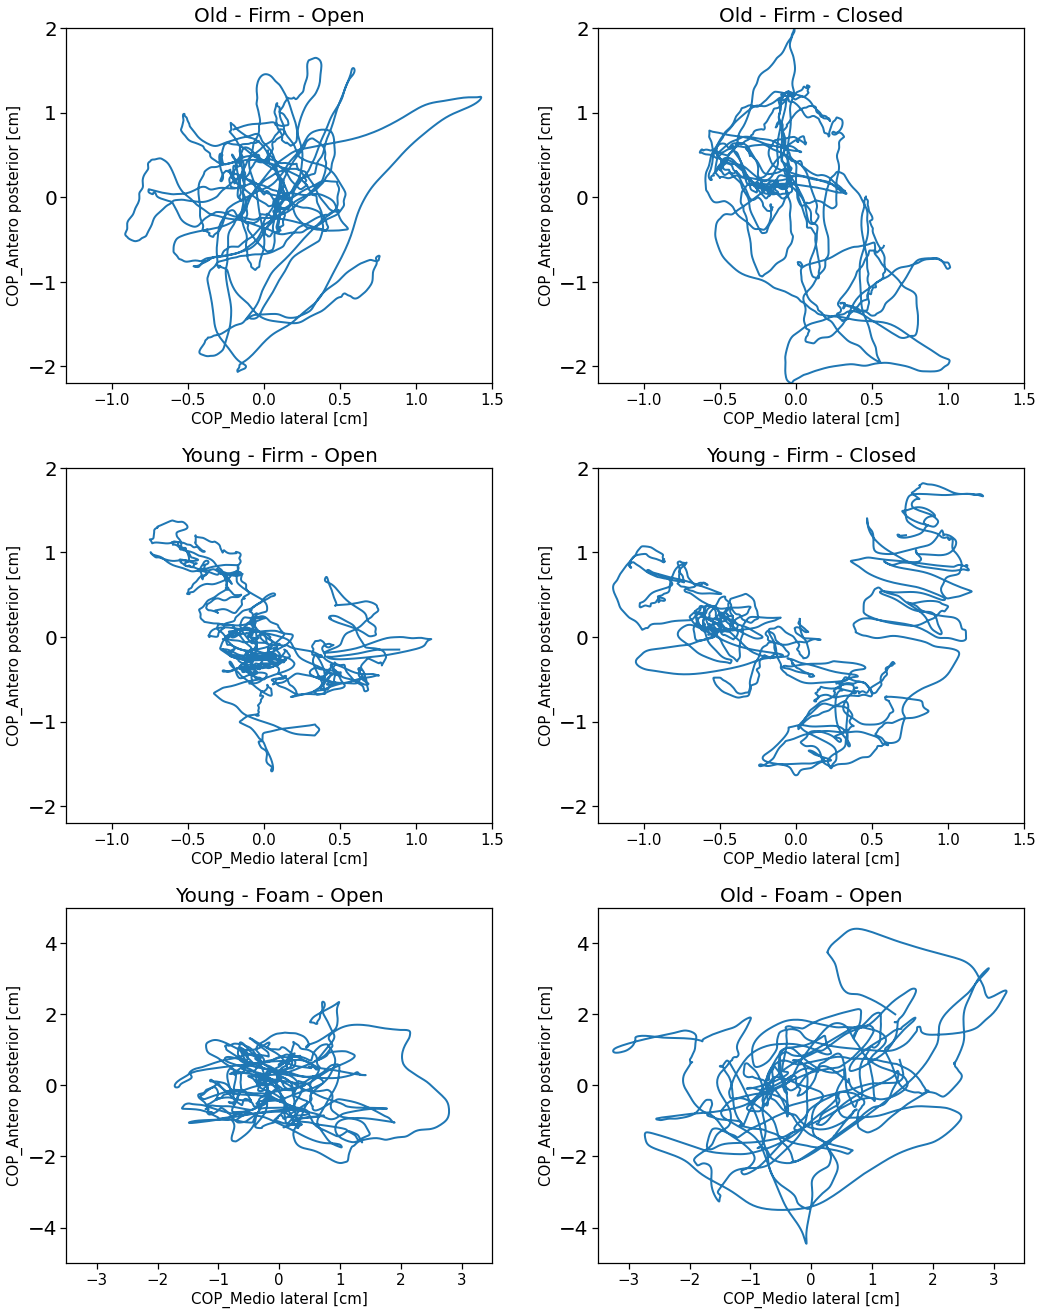

In [214]:
plt.rcParams['font.size']=15 #valores
plt.rcParams['xtick.labelsize']=15 # barras
plt.rcParams['ytick.labelsize']=20 # barras
plt.rcParams['axes.titlesize']=20 #titulo
plt.rcParams['axes.labelsize']=15 #eixos



fig, ax = plt.subplots(3,2,figsize=(15,6*3))#,sharex=True

fig.set_visible(True)


plt.sca(ax[0][0])
filter_trial = (data['Trial']=='BDS00038')
y=data[filter_trial]['COPx[cm]']-data[filter_trial]['COPx[cm]'].mean()
x=data[filter_trial]['COPy[cm]']-data[filter_trial]['COPy[cm]'].mean()
plt.plot(x,y)
plt.title('Old - Firm - Open')
plt.ylabel('COP_Antero posterior [cm]')
plt.xlabel('COP_Medio lateral [cm]')
plt.xlim(-1.3, 1.5) 
plt.ylim(-2.2, 2) 

plt.sca(ax[0][1])
filter_trial = (data['Trial']=='BDS00047')
y=data[filter_trial]['COPx[cm]']-data[filter_trial]['COPx[cm]'].mean()
x=data[filter_trial]['COPy[cm]']-data[filter_trial]['COPy[cm]'].mean()
plt.plot(x,y)
plt.title('Old - Firm - Closed')
plt.ylabel('COP_Antero posterior [cm]')
plt.xlabel('COP_Medio lateral [cm]')
plt.xlim(-1.3, 1.5) 
plt.ylim(-2.2, 2) 

plt.tight_layout()
plt.subplots_adjust(top=1.00) 

plt.sca(ax[1][0])
filter_trial = (data['Trial']=='BDS00212')
y=data[filter_trial]['COPx[cm]']-data[filter_trial]['COPx[cm]'].mean()
x=data[filter_trial]['COPy[cm]']-data[filter_trial]['COPy[cm]'].mean()
plt.plot(x,y)
plt.title('Young - Firm - Open')
plt.ylabel('COP_Antero posterior [cm]')
plt.xlabel('COP_Medio lateral [cm]')
plt.xlim(-1.3, 1.5) 
plt.ylim(-2.2, 2) 

plt.tight_layout()
plt.subplots_adjust(top=1.00) 

plt.sca(ax[1][1])
filter_trial = (data['Trial']=='BDS00215')
y=data[filter_trial]['COPx[cm]']-data[filter_trial]['COPx[cm]'].mean()
x=data[filter_trial]['COPy[cm]']-data[filter_trial]['COPy[cm]'].mean()
plt.plot(x,y)
plt.title('Young - Firm - Closed')
plt.ylabel('COP_Antero posterior [cm]')
plt.xlabel('COP_Medio lateral [cm]')
plt.xlim(-1.3, 1.5) 
plt.ylim(-2.2, 2) 


plt.sca(ax[2][0])
filter_trial = (data['Trial']=='BDS00209')
y=data[filter_trial]['COPx[cm]']-data[filter_trial]['COPx[cm]'].mean()
x=data[filter_trial]['COPy[cm]']-data[filter_trial]['COPy[cm]'].mean()
plt.plot(x,y)
plt.title('Young - Foam - Open')
plt.ylabel('COP_Antero posterior [cm]')
plt.xlabel('COP_Medio lateral [cm]')
plt.xlim(-3.5, 3.5) 
plt.ylim(-5, 5) 

plt.tight_layout()
plt.subplots_adjust(top=1.00) 

plt.sca(ax[2][1])
filter_trial = (data['Trial']=='BDS00041')
y=data[filter_trial]['COPx[cm]']-data[filter_trial]['COPx[cm]'].mean()
x=data[filter_trial]['COPy[cm]']-data[filter_trial]['COPy[cm]'].mean()
plt.plot(x,y)
plt.title('Old - Foam - Open')
plt.ylabel('COP_Antero posterior [cm]')
plt.xlabel('COP_Medio lateral [cm]')
plt.xlim(-3.5, 3.5) 
plt.ylim(-5, 5) 
